# Tutorial 7 (Introduction to AI)

# Part 2: Word2Vec

This part of today's exercises studies word embeddings.  The goal is to use the gensim word2vec library to create a word embedding.  We're going to use a relatively small corpus (a book), but this might allow us to ask question about that book.  Along the way, we'll generate a 2d plot to give some indication of when words appear in similar contexts.  

This will involve reading a file, breaking it up into lines (as smaller chunks), cleaning this up and analysing it.

As part of this study, we will use the gensim package, which can be installed by running:

**pip install gensim**

We'll also be using TSNE for display, and the sklearn's regular expression tools.

In [ ]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

In [ ]:
#matplotlib.use("TkAgg")

In [ ]:
#import matplotlib.pyplot as plt

## 1. Dataset

Here we read in the data we will work with (it's "Harry Potter and the Sorcerer's* Stone," by JK Rowling.

(* I could only find the American version as a text file; it's really a Philosopher's Stone.)

In [ ]:
data_dir = './'

In [ ]:
lesson_file = data_dir + 'potter.txt'

## 2. Removing the stopwords

Text comes with a number of features, it includes punctuation, and many common words occur frequently, giving little indication of context.  We want to remove punctuation, and remove common words.  (We might also do stemming: strip words down to their root, so that for example, "root" and "roots" are treated as the same word. However, we don't deal with this here.)

The set of common words that we want to remove are called stop words, and we will read in a file of them here.

In [ ]:
stopword_file = data_dir + 'long_stopwords.txt'

We want to strip punctuation out of our words, and the following does this (for the stop words, though these shouldn't contain any punctuation to start with).

Note that this uses lambda expressions to create anonymous functions. You could do this with a loop instead.

$\mathtt{lambda \ x : re.sub('[^A-Za-z0-9]+','',x)}$

This replaces anything which is not a letter or a number with nothing.  (This should be familiar to anyone who knows functional programming.)

In [ ]:
stop_words = []

b=[]

with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = list(map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp))

In [ ]:
print(stop_words)

['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'conta

In [ ]:
type(stop_words)

list

Next we write function that will clean up a word.  It strips any surrounding blank space, converts to lower case, removes any non-alphanumeric character, and strips out stop words.

In [ ]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

For example:

In [ ]:
clean("king's")

'kings'

In [ ]:
clean("they'll")

''

This now reads in the file, splits into lines, and cleans these up.

In [ ]:
sentences = []

with open(lesson_file,'r') as inpFile:
    x = inpFile.readlines()
    for line in x:
        if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)

In [ ]:
type(sentences)

list

Let's take a look at some of these.

In [ ]:
print(sentences[69:80])
print(sentences[100:110])

[[], ['howard'], [], ['harry', 'nasty', 'common'], [], ['dursley', 'heart', 'sinking', 'horribly', 'agree'], [], ['word', 'subject', 'upstairs', 'bed'], [], ['dursley', 'bathroom', 'dursley', 'crept', 'bedroom', 'window', 'peered', 'front', 'garden', 'cat'], []]
[['fancy', 'professor', 'mcgonagall'], [], ['turned', 'smile', 'tabby', 'smiling', 'severelooking', 'woman', 'wearing', 'square', 'glasses', 'exactly', 'shape', 'markings', 'cat', 'eyes', 'wearing', 'cloak', 'emerald', 'black', 'hair', 'drawn', 'tight', 'bun', 'looked', 'distinctly', 'ruffled'], [], ['asked'], [], ['dear', 'professor', 'cat', 'sit', 'stiffly'], [], ['stiff', 'sitting', 'brick', 'wall', 'day', 'professor', 'mcgonagall'], []]


We will also remove empty sentences.

In [ ]:
sentences = [sent for sent in sentences if sent !=[]]
print(len(sentences))

print(sentences[0:10])
print(sentences[100:110])

2959
[['harry', 'potter', 'sorcerers', 'stone'], ['chapter'], ['boy', 'lived'], ['dursley', 'number', 'privet', 'drive', 'perfectly', 'normal', 'people', 'expect', 'involved', 'strange', 'mysterious', 'hold', 'nonsense'], ['dursley', 'director', 'firm', 'called', 'grunnings', 'drills', 'big', 'beefy', 'man', 'neck', 'large', 'mustache', 'dursley', 'thin', 'blonde', 'usual', 'amount', 'neck', 'spent', 'time', 'craning', 'garden', 'fences', 'spying', 'neighbors', 'dursleys', 'small', 'son', 'called', 'dudley', 'opinion', 'finer', 'boy'], ['dursleys', 'wanted', 'secret', 'greatest', 'fear', 'discover', 'bear', 'potters', 'potter', 'dursleys', 'sister', 'hadnt', 'met', 'years', 'fact', 'dursley', 'pretended', 'sister', 'sister', 'goodfornothing', 'husband', 'undursleyish', 'dursleys', 'shuddered', 'neighbors', 'potters', 'arrived', 'street', 'dursleys', 'knew', 'potters', 'small', 'son', 'boy', 'good', 'reason', 'keeping', 'potters', 'dudley', 'mixing', 'child'], ['dursley', 'woke', 'dull'

## 3. Word2Vec model

Now we build a word2vec model, based on the sentences, and specifying with window the distance between the current word and other words of interest.  The size of the word vector is given by vector_size, and min_count ignores words with frequency less than the specified value.  The vocab is what remains. With this being a fairly small corpus, this has been run for a number of epochs, and the value, 100, is relatively high.

The index_to_key attribute of the trained model lists all the words in the vocabulary.

In [ ]:
model = Word2Vec(sentences, window=5, vector_size=100, min_count=5, epochs=100)

In [ ]:
model.wv.index_to_key

['harry',
 'ron',
 'hagrid',
 'hermione',
 'professor',
 'looked',
 'snape',
 'dumbledore',
 'going',
 'uncle',
 'time',
 'dudley',
 'harrys',
 'malfoy',
 'door',
 'eyes',
 'vernon',
 'neville',
 'yeh',
 'head',
 'thought',
 'mcgonagall',
 'potter',
 'told',
 'people',
 'quirrell',
 'room',
 'will',
 'face',
 'gryffindor',
 'boy',
 'left',
 'good',
 'hogwarts',
 'ter',
 'house',
 'turned',
 'heard',
 'stone',
 'great',
 'long',
 'suddenly',
 'hand',
 'bit',
 'school',
 'three',
 'aunt',
 'knew',
 'wand',
 'quidditch',
 'asked',
 'day',
 'voice',
 'dark',
 'inside',
 'cloak',
 'open',
 'petunia',
 'keep',
 'things',
 'hadnt',
 'dursley',
 'find',
 'years',
 'wood',
 'yer',
 'front',
 'feet',
 'dursleys',
 'pulled',
 'large',
 'black',
 'course',
 'started',
 'floor',
 'mind',
 'felt',
 'slytherin',
 'hall',
 'thing',
 'weasley',
 'magic',
 'lot',
 'air',
 'filch',
 'moment',
 'fell',
 'night',
 'mirror',
 'walked',
 'letter',
 'wanted',
 'sat',
 'bed',
 'table',
 'points',
 'books',
 'c

In [ ]:
labels = []
tokens = []

#ignore the deprecation warning!!
for word in model.wv.index_to_key:
    tokens.append(model.wv[word])
    labels.append(word)

## 4. TSNE plot to find the similarity of words

The previous code gathers up the high dimensional data describing the word embedding.  TSNE is a tool for visualising high dimensional data, and below we give this the word embedding data and ask it to project it onto two dimensions.

In [ ]:
tsne_model = TSNE(perplexity=200, n_components=2, init='pca', n_iter=5000)

In [ ]:
new_values = tsne_model.fit_transform(tokens)

Building two lists from the transformed model, we can now plot the data in such a way that two words are close together is they occur in similar contexts.

In [ ]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

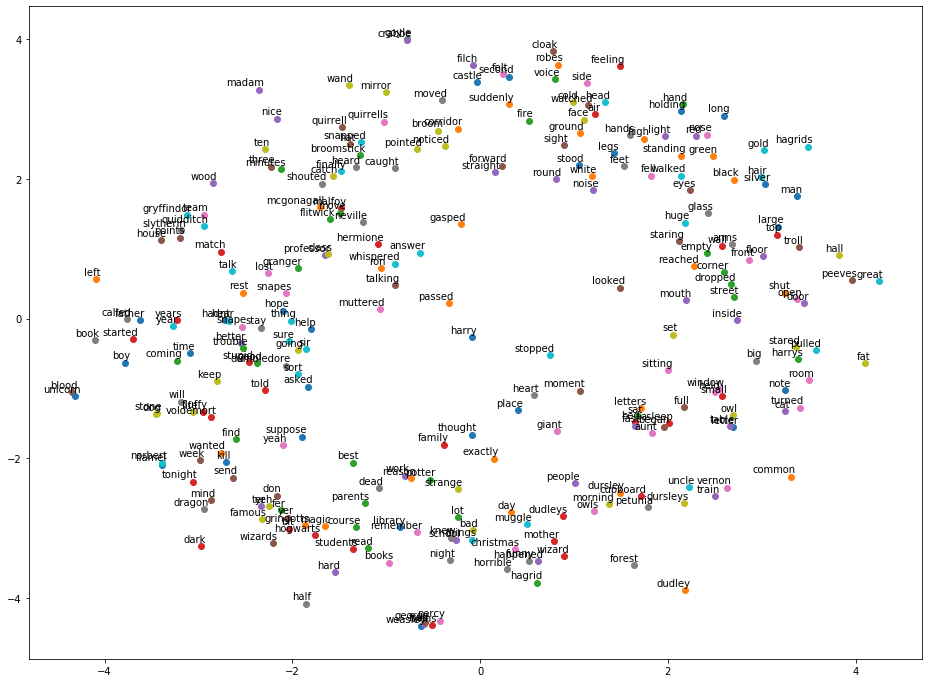

In [ ]:
plt.figure(figsize=(16, 12))
for i in range(len(x)//5):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

## 5. Analogies

The corpus is very small, but we might query it to find words occurring in similar contexts.  Word2vec returns a keyedvector, which has a number of methods for measuring and ranking distances between words.  Below we ask for similarity of words from the corpus.  Notice that this is working with the model, not the projection onto 2d, but you can still see the similarities.

One good example is that we can ask who Harry Potter's mother is and we get the correct answer.

Try your own examples.

In [ ]:
model.wv.similarity('scar','lightning')

0.7986022

In [ ]:
model.wv.rank('scar','lightning')

1

In [ ]:
model.wv.rank('mysterious','owl')

132

In [ ]:
model.wv.rank('letter','owl')

82

In [ ]:
model.wv.most_similar(positive=['quidditch'])

[('training', 0.5766181349754333),
 ('field', 0.4961621165275574),
 ('win', 0.4941394031047821),
 ('players', 0.47981178760528564),
 ('game', 0.47741180658340454),
 ('woods', 0.4714738130569458),
 ('team', 0.46935275197029114),
 ('match', 0.46380510926246643),
 ('winning', 0.45640695095062256),
 ('talk', 0.4519573152065277)]

In [ ]:
model.wv.most_similar(positive=['play', 'snitch'],negative=['car'])

[('chaser', 0.6589082479476929),
 ('quaffle', 0.6454234719276428),
 ('chasers', 0.6307443976402283),
 ('keeper', 0.6020650863647461),
 ('bludgers', 0.5917118191719055),
 ('posts', 0.5643715858459473),
 ('explained', 0.56092369556427),
 ('seeker', 0.5569669008255005),
 ('woods', 0.5519024729728699),
 ('captain', 0.5414088368415833)]

In [ ]:
model.wv.most_similar_cosmul(positive=['harry','potter','mother'])

[('lily', 0.26519009470939636),
 ('son', 0.2642345428466797),
 ('bedroom', 0.25768932700157166),
 ('mistake', 0.25606217980384827),
 ('james', 0.25504159927368164),
 ('cleared', 0.24692881107330322),
 ('zoo', 0.23807553946971893),
 ('living', 0.23549118638038635),
 ('cupboard', 0.23012271523475647),
 ('hey', 0.2299761176109314)]

In [ ]:
model.wv.most_similar("slytherin".split())

[('hufflepuff', 0.640053391456604),
 ('captain', 0.6254000067710876),
 ('ravenclaw', 0.6086276173591614),
 ('winning', 0.5871499180793762),
 ('slytherins', 0.5845964550971985),
 ('cup', 0.5721222758293152),
 ('possession', 0.5472844839096069),
 ('won', 0.5236311554908752),
 ('sorting', 0.5208791494369507),
 ('showing', 0.514123260974884)]

## Exercises

1) Take your solution to last week's exercises (applying neural networks to the Digits dataset from sklearn), and:

- add early stopping to it
- experiment with adding dropout to your model (and perhaps also other regularisations).  Note that we are already getting good results, do it might be hard to improve
- plot epoch against loss for the training of your neural network.  You might also consider adding a validation set to the training and plotting the loss for this too.

2) Experiment further with asking queries of the trained word2vec model.  You might find your own text and train using this (one is included on the moodle (as file 898-0.txt, it's The Lesson of the Master, by Henry James).